Contributions:
- Data by Ben Lawrie and his team
- Samples by Mahshid Ahmadi and CO
- AtomAI and PyroVED by Maxim Ziatdinov
- Workflow by Sergei Kalinin

*    Analysis performed by  [Sheryl L. Sanchez](https://scholar.google.com/citations?hl=en&user=zFRKT-MAAAAJ) and [Jonghee Yang](https://scholar.google.com/citations?user=jLyJOXMAAAAJ&hl=en&oi=ao)


*   Data by [Jonghee Yang](https://scholar.google.com/citations?user=jLyJOXMAAAAJ&hl=en&oi=ao)
,[Mahshid Ahmadi](https://scholar.google.com/citations?hl=en&user=DNOfTQ0AAAAJ&view_op=list_works&sortby=pubdate), Elham Foadian


In [ ]:
!pip install atomai pyroved

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.4/176.4 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.3 MB/s eta 0:00:00
  Created wheel for mendeleev: filename=mendeleev-0.6.1-py2.py3-none-any.whl size=174959 sha256=c5ec70492427447b14f925baf8014d93a1aab88d2ca632591de09bf5d148d65f
  Stored in directory: /root/.cache/pip/wheels/58/dc/35/3fa57a6ef1956eb96f1c261442ccb8a0f34a7f9d7403d82c96
Successfully built mendeleev


In [ ]:
from copy import deepcopy as dc

import numpy as np
import torch
import h5py

from scipy import ndimage
from sklearn import decomposition

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import pyroved as pv
import atomai as aoi
import matplotlib.pyplot as plt

import gdown
# For image/data manipulation
from scipy.ndimage import zoom

In [ ]:

# Download URLs
urls = [
    'https://drive.google.com/uc?id=1sXbU5TtQpPQZieKGfXZR3IHZYIbihMuu',
    'https://drive.google.com/uc?id=1BAdUYdCxtLCH-PwZID_AJnWmql-x-Phw',
    'https://drive.google.com/uc?id=1cBfegFNV782WCIEKAn_hDA2RgtAJQkAx'
]

# Temporary file paths
temp_paths = ['/tmp/h5_f1.h5', '/tmp/h5_f2.h5', '/tmp/h5_f3.h5']

# Download and load datasets
h5_datasets = {}
for i, url in enumerate(urls):
    gdown.download(url, temp_paths[i], quiet=False)
    h5_datasets[f'h5_f{i+1}'] = h5py.File(temp_paths[i], 'r+')


Downloading...
From: https://drive.google.com/uc?id=1sXbU5TtQpPQZieKGfXZR3IHZYIbihMuu
To: /tmp/h5_f1.h5
100%|██████████| 18.0M/18.0M [00:00<00:00, 75.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BAdUYdCxtLCH-PwZID_AJnWmql-x-Phw
To: /tmp/h5_f2.h5
100%|██████████| 26.3M/26.3M [00:00<00:00, 209MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cBfegFNV782WCIEKAn_hDA2RgtAJQkAx
To: /tmp/h5_f3.h5
100%|██████████| 15.4M/15.4M [00:00<00:00, 193MB/s]


Keys in Acquisition0: ['ImageData', 'PhysicalData', 'SVIData', 'StateEnumeration']
['DimensionScaleX', 'DimensionScaleY', 'DimensionScaleZ', 'Image', 'PrimaryGlassMediumInterfacePosition', 'SecondaryGlassMediumInterfacePosition', 'TOffset', 'XOffset', 'YOffset', 'ZOffset']


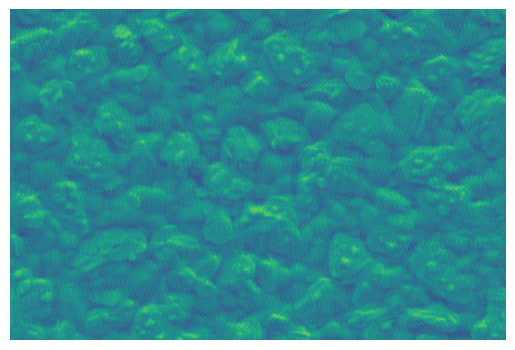

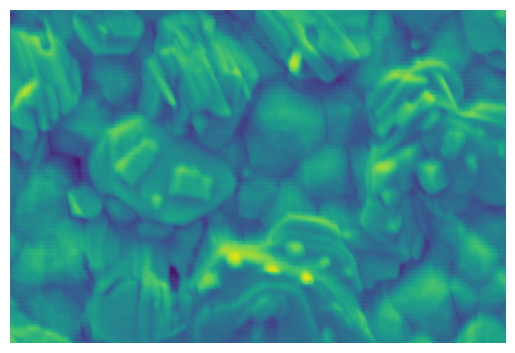

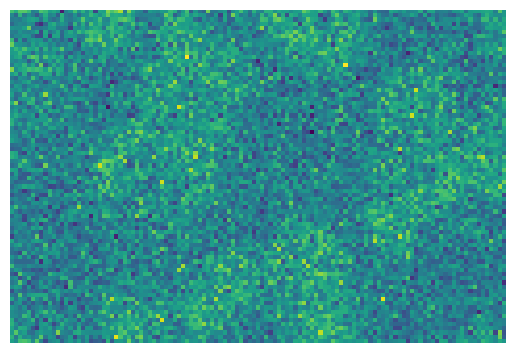

hdata shape: (80, 119, 1024)


In [ ]:

# --------------------------------------------------------------------------------
# **Variable to select which dataset to analyze**
# To change datasets, adjust `dataset_number` to 1, 2, or 3:
#     - 1 for `h5_f1`
#     - 2 for `h5_f2`
#     - 3 for `h5_f3`
# --------------------------------------------------------------------------------
dataset_number = 3 #@param {type:"integer"} # Change this number to select a different dataset
current_dataset = h5_datasets[f'h5_f{dataset_number}']
# --------------------------------------------------------------------------------

# Function to print keys of a specific group if it exists
def print_group_keys(dataset, group_name):
    if group_name in dataset:
        print(f'Keys in {group_name}: {list(dataset[group_name].keys())}')
    else:
        print(f'{group_name} not found in this dataset.')

# Access the 'Acquisition0' group in the current dataset and print keys
print_group_keys(current_dataset, 'Acquisition0')

# Access 'ImageData' keys within 'Acquisition0' if available
if 'Acquisition0' in current_dataset and 'ImageData' in current_dataset['Acquisition0']:
    print(list(current_dataset['Acquisition0']['ImageData'].keys()))

# Function to visualize image data
def plot_image(dataset, acquisition_num, slice_idx=None):
    acquisition_key = f'Acquisition{acquisition_num}'
    if acquisition_key in dataset and 'ImageData' in dataset[acquisition_key]:
        image = np.squeeze(dataset[acquisition_key]['ImageData']['Image'])
        if slice_idx is not None and len(image.shape) > 2:
            plt.imshow(image[slice_idx, :, :])
        else:
            plt.imshow(image)
        plt.axis('off')
        plt.show()
        return image
    else:
        print(f'{acquisition_key} or ImageData not found.')
        return None

im0 = plot_image(current_dataset, 0)
im1 = plot_image(current_dataset, 1)
im2 = plot_image(current_dataset, 2, slice_idx=200)

# Function to process image data for analysis
def process_image_data(dataset, acquisition_num):
    acquisition_key = f'Acquisition{acquisition_num}'
    if acquisition_key in dataset and 'ImageData' in dataset[acquisition_key]:
        image = np.squeeze(dataset[acquisition_key]['ImageData']['Image']).astype(np.float64)
        d1, d2, d3 = image.shape
        reshaped_image = image.reshape(d1, d2 * d3)
        y = torch.from_numpy(reshaped_image.T)[:, None]
        y = torch.nn.functional.avg_pool1d(y, 1, 1).squeeze().numpy()
        y_reshaped = y.reshape(d2, d3, -1)
        return y_reshaped.astype(np.float64)
    else:
        print(f'{acquisition_key} or ImageData not found.')
        return None


hdata = process_image_data(current_dataset, 2)
if hdata is not None:
    print(f'hdata shape: {hdata.shape}')


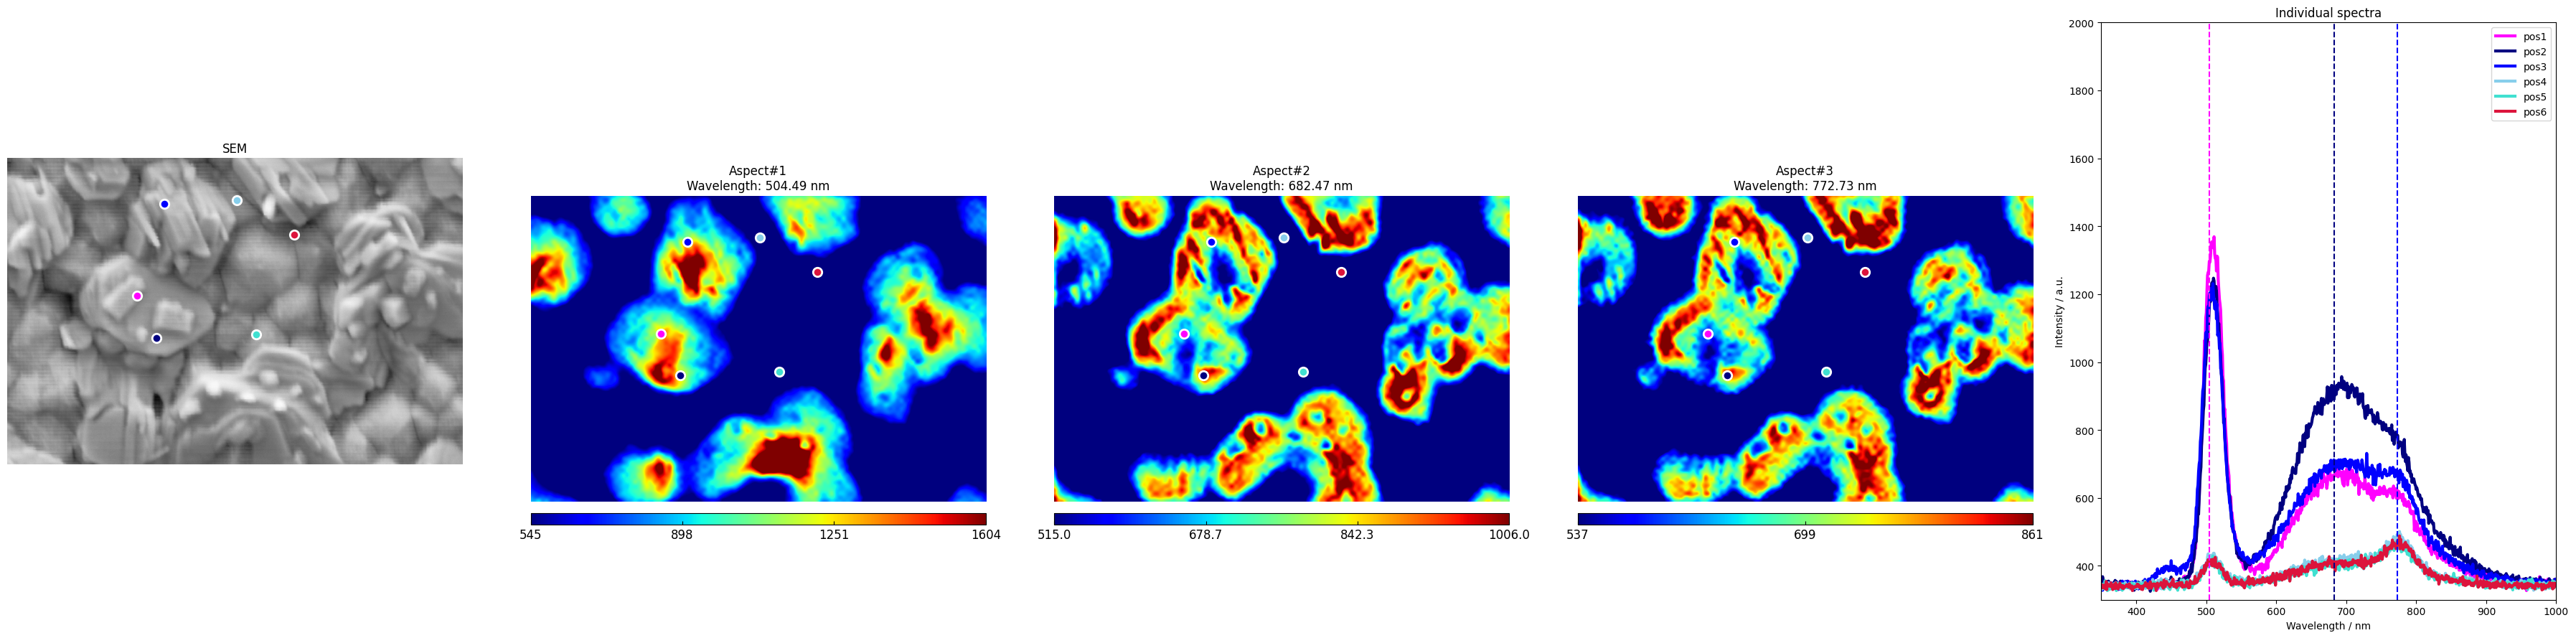

Slice 402 corresponds to wavelength: 504.49 nm
Slice 611 corresponds to wavelength: 682.47 nm
Slice 717 corresponds to wavelength: 772.73 nm


In [ ]:

# Define predetermined slices and positions for each dataset
dataset_configs = {
    1: {
        'positions': {
            'pos1': [30, 35], 'pos2': [40, 45], 'pos3': [50, 25],
            'pos4': [60, 15], 'pos5': [40, 50], 'pos6': [20, 20]
        },
        'slices': [402, 608, 700]
    },
    2: {
        'positions': {
            'pos1': [44, 26], 'pos2': [30, 43], 'pos3': [32, 23],
            'pos4': [8, 3], 'pos5': [25, 35], 'pos6': [20, 20]
        },
        'slices': [402, 572, 750]
    },
    3: {
        'positions': {
            'pos1': [34, 36], 'pos2': [39, 47], 'pos3': [41, 12],
            'pos4': [60, 11], 'pos5': [65, 46], 'pos6': [75, 20]
        },
        'slices': [402, 611, 717]
    }
}

positions = dataset_configs[dataset_number]['positions']
slices = dataset_configs[dataset_number]['slices']



# Calculate scaling factors based on SEM and CL map dimensions
scale_x = im1.shape[1] / hdata.shape[1]  # Width scaling factor
scale_y = im1.shape[0] / hdata.shape[0]  # Height scaling factor

# Rescale CL maps to match SEM image dimensions and calculate vmin and vmax automatically
rescaled_cl_maps = []
for s in slices:
    rescaled_map = zoom(hdata[..., s], (scale_y, scale_x))
    vmin = np.floor(np.percentile(rescaled_map, 50))  # Use percentile for contrast
    vmax = np.ceil(np.percentile(rescaled_map, 98))
    rescaled_cl_maps.append((rescaled_map, vmin, vmax))

# Plotting the SEM image and rescaled CL maps with scatter points and scale bars
fig, ax = plt.subplots(1, 5, figsize=(36, 9))

# Plot SEM image without labeled positions
ax[0].imshow(im1, cmap='Greys_r')
colors = ['magenta', 'navy', 'blue', 'skyblue', 'turquoise', 'crimson']
for i, (label, pos) in enumerate(positions.items()):
    scaled_pos = np.array(pos) * [scale_x, scale_y]
    ax[0].scatter(*scaled_pos, c=colors[i], marker='o', edgecolor='white', linewidth=2, s=80)
ax[0].set_title('SEM')
ax[0].axis('off')

# Define wavelength range
wavelength = np.linspace(162.17, 1033.31, 1024)

# Plot the rescaled CL maps with scatter points and scale bars
for i, (rescaled_map, vmin, vmax) in enumerate(rescaled_cl_maps):
    im = ax[i+1].imshow(rescaled_map, cmap='jet', origin="upper", vmin=vmin, vmax=vmax)
    for pos, color in zip(positions.values(), colors):
        ax[i+1].scatter(pos[0]*scale_x, pos[1]*scale_y, c=color, marker='o', edgecolor='white', linewidth=2, s=80)
    wavelength_value = wavelength[slices[i]]
    ax[i+1].set_title(f'Aspect#{i+1}\nWavelength: {wavelength_value:.2f} nm')
    ax[i+1].axis('off')

    # Adjust color bar
    num_ticks = 4 if i != 2 else 3
    cbar = plt.colorbar(im, ax=ax[i+1], aspect=40, orientation='horizontal', pad=0.02)
    cbar.set_ticks(np.linspace(vmin, vmax, num_ticks))
    cbar.ax.tick_params(axis='x', direction='in', labelsize=12)

# Plot individual spectra
ax[4].clear()
for label, pos, color in zip(positions.keys(), positions.values(), colors):
    ax[4].plot(wavelength, hdata[pos[1], pos[0], :], linewidth=3, c=color, label=label)

# Add vertical lines at corresponding wavelengths
for i, s in enumerate(slices):
    ax[4].axvline(x=wavelength[s], linestyle='--', c=colors[i])

ax[4].set_title('Individual spectra')
ax[4].set_xlabel('Wavelength / nm')
ax[4].set_ylabel('Intensity / a.u.')
ax[4].set_xlim(350, 1000)
ax[4].set_ylim(300, 2000)
ax[4].legend(loc='upper right')

plt.tight_layout()
plt.show()

# Print slice-to-wavelength mappings
for i, s in enumerate(slices):
    wavelength_s = wavelength[s]
    print(f'Slice {s} corresponds to wavelength: {wavelength_s:.2f} nm')


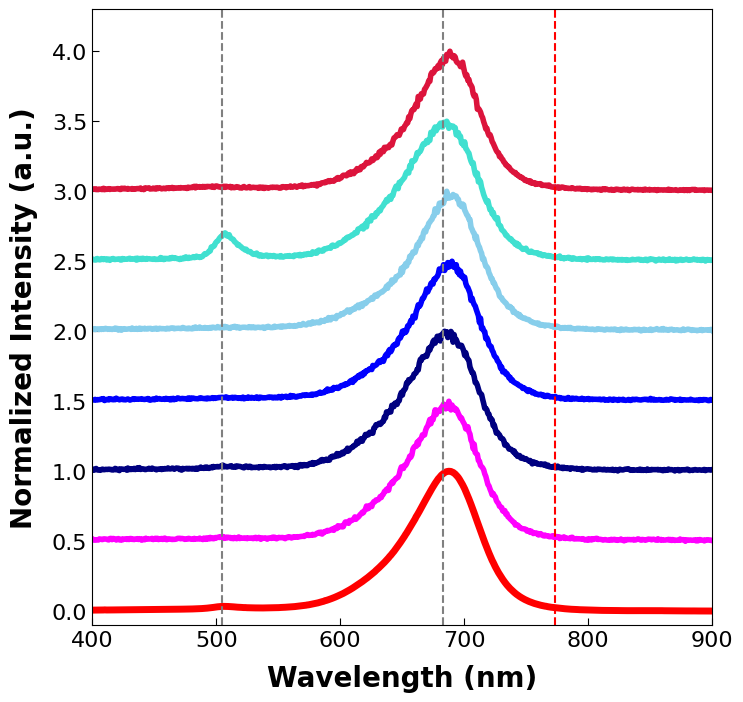

In [ ]:


hdata_s = hdata.mean(axis=(0, 1))


normalized_spectra = {}
for label, pos in positions.items():
    spectrum = hdata[pos[1], pos[0], :]
    normalized_spectra[label] = (spectrum - np.min(spectrum)) / (np.max(spectrum) - np.min(spectrum))


plt.figure(figsize=(8, 8))  # Increase figure size for better visibility
plt.plot(wavelength, (hdata_s - np.min(hdata_s)) / (np.max(hdata_s) - np.min(hdata_s)), c='red', linewidth=5, label='Mean Spectrum')


colors = ['magenta', 'navy', 'blue', 'skyblue', 'turquoise', 'crimson']
offset = 0.5  # Increase the offset to avoid overlap

for i, (label, spectrum) in enumerate(normalized_spectra.items()):
    plt.plot(wavelength, spectrum + offset * (i + 1), c=colors[i], linewidth=4, label=label)

plt.axvline(x=505, linestyle='--', c='gray', label='505 nm')
plt.axvline(x=683, linestyle='--', c='gray', label='405 nm')
plt.axvline(x=773, linestyle='--', c='red', label='687 nm')

plt.xlabel('Wavelength (nm)', fontsize=20, labelpad=10, fontweight='bold')
plt.ylabel('Normalized Intensity (a.u.)', fontsize=20, labelpad=10, fontweight='bold')
plt.tick_params(axis='x', length=5, labelsize=16, direction='in')
plt.tick_params(axis='y', length=5, labelsize=16, direction='in')
plt.xlim(400, 900)
plt.ylim(-0.1, offset * (len(positions) + 2) + 0.3)  # Adjust ylim to match the increased offset
#plt.legend(fontsize=12, loc='upper right')

plt.show()